# Evaluating classification models

In this notebook, we will look at how to evaluate classification models in terms of the confusion matrix and measures such as accuracy, precision, and recall, as well as the ROC curve and AUC. 

We will, again, use the diabetes dataset that can be used to classify whether people have diabetes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
diab_data = pd.read_csv('diabetes.csv')

In [3]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = diab_data.drop(columns = ["Age", "Outcome"])
y = diab_data["Outcome"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

We will first use our KNN models for $K=5$ and $K=10$ as examples, so let us train them.

In [6]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_train_pred5 = knn5.predict(X_train)
y_test_pred5 = knn5.predict(X_test)

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
y_train_pred10 = knn10.predict(X_train)
y_test_pred10 = knn10.predict(X_test)

## The confusion matrix

We can use the `confusion_matrix` function from the Scikit-learn metrics submodule, to get a confusion matrix.

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
confusion_matrix(y_test, y_test_pred5)

array([[92, 31],
       [30, 39]])

In [9]:
confusion_matrix(y_test, y_test_pred10)

array([[107,  16],
       [ 34,  35]])

We can also make it visually more appealing with a heatmap style plot using `ConfusionMatrixDisplay` also from Scikit-learn metrics.

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

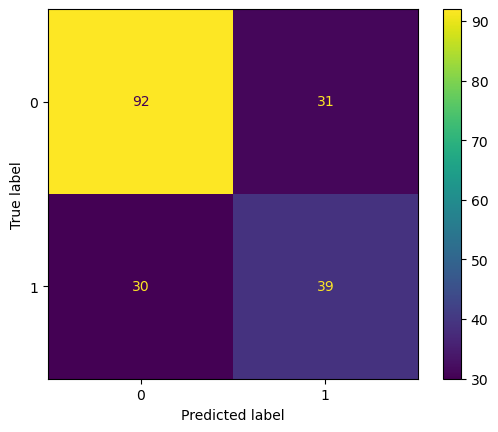

In [11]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred5)).plot()
plt.show()

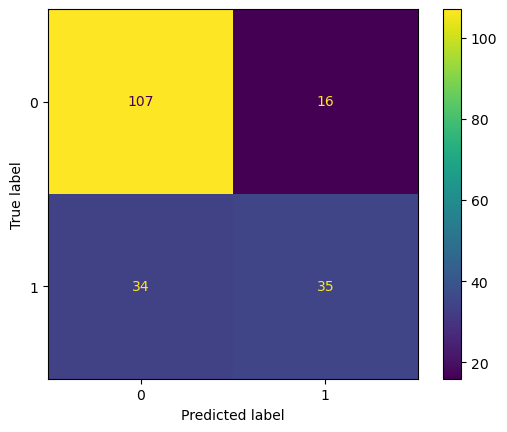

In [12]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred10)).plot()
plt.show()

It looks like the model for $K=10$ make less False Positive predictions (16 instead of 31) than the model for $K=5$. On the other hand, it makes more False Negative predictions (34 instead of 30). Let us calculate the various metrics to make a more detailed comparison.

If one wants to look at percentages instead, we can normalize the values in the cells to sum to one:

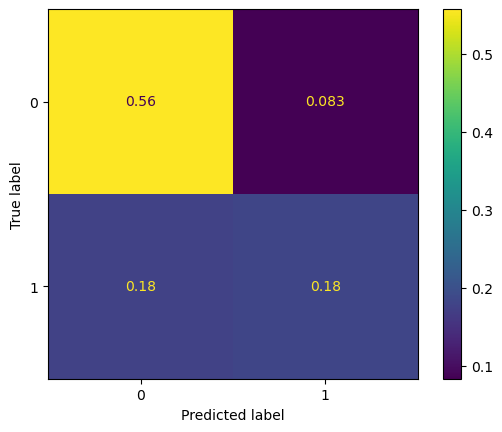

In [13]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred10, normalize='all')).plot()
plt.show()

## Evaluation metrics

We can import all the revelant evaluation metrics from Scikit-learn metrics submodule:

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [15]:
EvaluationScoreDF = pd.DataFrame({"K": [5, 10],
                                  "Accuracy (test)": [accuracy_score(y_test, y_test_pred5), accuracy_score(y_test, y_test_pred10)],
                                  "Precision (test)": [precision_score(y_test, y_test_pred5), precision_score(y_test, y_test_pred10)],
                                  "Recall (test)": [recall_score(y_test, y_test_pred5), recall_score(y_test, y_test_pred10)],
                                  "F1 (test)": [f1_score(y_test, y_test_pred5), f1_score(y_test, y_test_pred10)]})
EvaluationScoreDF                            

,K,Accuracy (test),Precision (test),Recall (test),F1 (test)
0,5,0.682292,0.557143,0.565217,0.561151
1,10,0.739583,0.686275,0.507246,0.583333


We see that the $K=10$ seems slightly better on most evaluation metrics, however, if recall is the most important to us, $K=5$ is actually a better choice.

## ROC and AUC evaluation

We will not look at the ROC curve and calculate AUC for the models. For this we will use our logistic regression model as it naturally can give us class probabilities instead hard labels.

In [16]:
from sklearn import linear_model

In [17]:
logit_model = linear_model.LogisticRegression()

In [18]:
X_train = X_train[["Glucose", "BMI"]]
X_test = X_test[["Glucose", "BMI"]]

In [19]:
logit_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

We want to get the class probabilities (of class 1). We can use the method `.predict_proba` on the logistic model object:

In [20]:
logit_model.predict_proba(X_test)

array([[0.81920253, 0.18079747],
       [0.69937823, 0.30062177],
       [0.8059199 , 0.1940801 ],
       [0.88151661, 0.11848339],
       [0.61522455, 0.38477545],
       [0.73113449, 0.26886551],
       [0.97601199, 0.02398801],
       [0.69575188, 0.30424812],
       [0.42103522, 0.57896478],
       [0.43252579, 0.56747421],
       [0.8325353 , 0.1674647 ],
       [0.1828805 , 0.8171195 ],
       [0.48455961, 0.51544039],
       [0.83479919, 0.16520081],
       [0.91478437, 0.08521563],
       [0.64011523, 0.35988477],
       [0.85143022, 0.14856978],
       [0.90794117, 0.09205883],
       [0.24349335, 0.75650665],
       [0.31061343, 0.68938657],
       [0.85164838, 0.14835162],
       [0.88658583, 0.11341417],
       [0.72840564, 0.27159436],
       [0.83960214, 0.16039786],
       [0.54961798, 0.45038202],
       [0.14232986, 0.85767014],
       [0.86964182, 0.13035818],
       [0.93788371, 0.06211629],
       [0.58664121, 0.41335879],
       [0.89663475, 0.10336525],
       [0.

Note how it returns two columns of probabilities! The first column is the probability of class 0, while the second column is the probabilities of class 1 (note how the rows sum to 1). Thus, to get the probabilities for class 1, we can take the second column (denoted 1 in Python - I think I mixed it up last time):

In [21]:
y_train_probs = logit_model.predict_proba(X_train)[:,1]
y_train_pred = logit_model.predict(X_train)

y_test_probs = logit_model.predict_proba(X_test)[:,1]
y_test_pred = logit_model.predict(X_test)

y_test_probs

array([0.18079747, 0.30062177, 0.1940801 , 0.11848339, 0.38477545,
       0.26886551, 0.02398801, 0.30424812, 0.57896478, 0.56747421,
       0.1674647 , 0.8171195 , 0.51544039, 0.16520081, 0.08521563,
       0.35988477, 0.14856978, 0.09205883, 0.75650665, 0.68938657,
       0.14835162, 0.11341417, 0.27159436, 0.16039786, 0.45038202,
       0.85767014, 0.13035818, 0.06211629, 0.41335879, 0.10336525,
       0.92712376, 0.6587058 , 0.87305307, 0.70817788, 0.41620622,
       0.62250411, 0.9007434 , 0.224955  , 0.21038019, 0.62664747,
       0.07329677, 0.31256065, 0.28319683, 0.17709703, 0.04858141,
       0.62072452, 0.31909992, 0.21488571, 0.12893718, 0.91365645,
       0.07741613, 0.47456395, 0.62191909, 0.34722378, 0.26003592,
       0.05864551, 0.58274172, 0.00564696, 0.44706571, 0.7263794 ,
       0.60239128, 0.40654806, 0.16311773, 0.09142839, 0.16006298,
       0.74522273, 0.06335233, 0.77429817, 0.0651397 , 0.87663895,
       0.61548032, 0.07735809, 0.06705794, 0.21046015, 0.10147

To plot the ROC curve, we well use the `roc_curve` from Scikit-learn metrics to calculate the FPR and TPR for us that we can then plot

In [22]:
from sklearn.metrics import roc_curve, auc

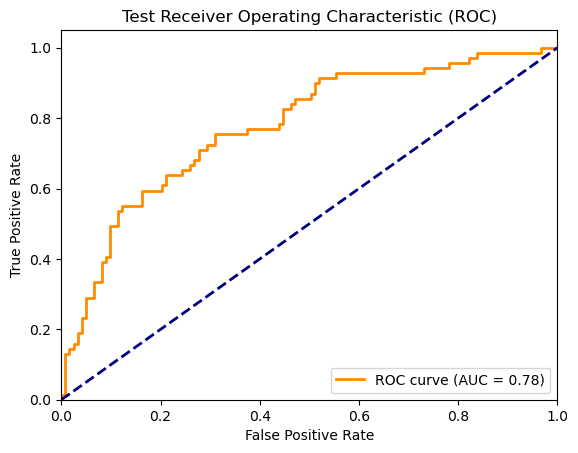

In [23]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

We can also get the AUC directly using the `roc_auc_score` function from Scikit-learn:

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
roc_auc_score(y_test, y_test_probs)

0.777895605043007